### Predicting players rating

- In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.
- The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

#### About the Dataset
- The ultimate Soccer database for data analysis and machine learning
- The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
- The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [2]:
## Reading data from database into df
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

#### Data Pre-Processing

In [5]:
df.shape

(183978, 42)

In [6]:
## Checking for NaN Values
df[pd.isnull(df).any(axis=1)]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,None,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,None,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0
392,393,202425,245653,2011-02-22 00:00:00,64.0,69.0,left,None,_0,47.0,...,52.0,42.0,64.0,65.0,62.0,11.0,5.0,15.0,10.0,10.0
393,394,202425,245653,2007-02-22 00:00:00,64.0,69.0,left,None,_0,47.0,...,52.0,42.0,64.0,65.0,62.0,11.0,5.0,15.0,10.0,10.0
446,447,52782,38423,2010-02-22 00:00:00,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
447,448,52782,38423,2009-08-30 00:00:00,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
448,449,52782,38423,2008-08-30 00:00:00,68.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0


In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
independentFeatures=['potential','crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',       'long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']

In [10]:
dependentFeature=['overall_rating']

In [11]:
# Cleaning data
df =df.dropna()

In [12]:
df.shape

(180354, 42)

#### Splitting dependent data and Independent Data

In [13]:
X = df[independentFeatures]
y=df[dependentFeature]

In [14]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


#### Splitting data in to Train and Test

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [17]:
X_train.shape

(126247, 34)

In [18]:
X_test.shape

(54107, 34)

## Linear Regression Model

In [19]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction Using LinearRegression Model

In [20]:
y_pred=regressor.predict(X_test)

In [21]:
y_pred

array([[73.08829436],
       [68.89938701],
       [66.98906587],
       ...,
       [68.2430775 ],
       [74.58505829],
       [74.54300667]])

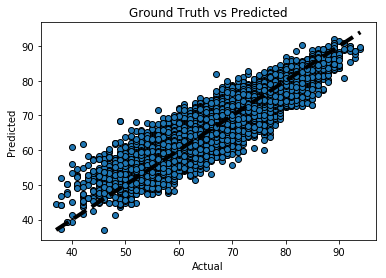

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
#plt.scatter(y_test,y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Residual Histogram

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


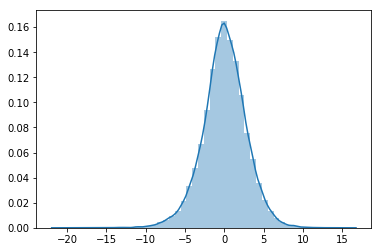

In [23]:
sns.distplot((y_test-y_pred),bins=50)

### Model Evaluation

In [24]:
### Printing the intercept 
### This value shows the estimated rating when all the independent features are zero
print(regressor.intercept_)

[-3.63369432]


In [25]:
pd.DataFrame(list(zip(X.columns,np.transpose(regressor.coef_))))

,0,1
0,potential,[0.37864016341460616]
1,crossing,[0.022811857403481076]
2,finishing,[0.012296515504989175]
3,heading_accuracy,[0.06909930311832609]
4,short_passing,[0.05068290945538086]
5,volleys,[0.003783943184783267]
6,dribbling,[-0.013250543736021548]
7,curve,[0.0116104755579642]
8,free_kick_accuracy,[0.011693673184714681]
9,long_passing,[0.007459236799177035]


#### Interpreting Coefficients

- Holding all the other features fixed, a 1 unit increase in potential is associated with [0.37] increase in rating
- Holding all the other features fixed, a 1 unit increase in crossing is associated with [0.02] increase in rating
- Holding all the other features fixed, a 1 unit increase in finishing is associated with [0.01] increase in rating
- Holding all the other features fixed, a 1 unit increase in heading_accuracy is associated with [0.06] increase in rating
- Holding all the other features fixed, a 1 unit increase in short_passing is associated with [0.05] increase in rating
- Holding all the other features fixed, a 1 unit increase in volleys is associated with [0.003] increase in rating
- Holding all the other features fixed, a 1 unit increase in dribbling is associated with [-0.013] decrease in rating
- Holding all the other features fixed, a 1 unit increase in curve is associated with [0.011] increase in rating
- Holding all the other features fixed, a 1 unit increase in free_kick_accuracy is associated with [0.011] increase in rating
- Holding all the other features fixed, a 1 unit increase in ong_passing is associated with [0.007] increase in rating
- Holding all the other features fixed, a 1 unit increase in ball_control is associated with [0.133] increase in rating
- Holding all the other features fixed, a 1 unit increase in acceleration is associated with [0.005] increase in rating
- Holding all the other features fixed, a 1 unit increase in sprint_speed is associated with [0.009] increase in rating
- Holding all the other features fixed, a 1 unit increase in agility is associated with [-0.007] decrease in rating
- Holding all the other features fixed, a 1 unit increase in reactions is associated with [0.210] increase in rating
- Holding all the other features fixed, a 1 unit increase in balance is associated with [0.007] increase in rating
- Holding all the other features fixed, a 1 unit increase in shot_power is associated with [0.016] increase in rating
- Holding all the other features fixed, a 1 unit increase in jumping is associated with [0.016] increase in rating
- Holding all the other features fixed, a 1 unit increase in stamina is associated with [-0.006] decrease in rating
- Holding all the other features fixed, a 1 unit increase in strength is associated with [0.061] increase in rating
- Holding all the other features fixed, a 1 unit increase in long_shots is associated with [-0.013] decrease in rating
- Holding all the other features fixed, a 1 unit increase in aggression is associated with [0.021] increase in rating
- Holding all the other features fixed, a 1 unit increase in interceptions is associated with [0.012] increase in rating
- Holding all the other features fixed, a 1 unit increase in positioning is associated with [-0.010] decrease in rating
- Holding all the other features fixed, a 1 unit increase in vision is associated with [-0.001] decrease in rating
- Holding all the other features fixed, a 1 unit increase in penalties is associated with [0.014] increase in rating
- Holding all the other features fixed, a 1 unit increase in marking is associated with [0.031] increase in rating
- Holding all the other features fixed, a 1 unit increase in standing_tackle is associated with [0.002] increase in rating
- Holding all the other features fixed, a 1 unit increase in sliding_tackle is associated with [-0.027] decrease in rating
- Holding all the other features fixed, a 1 unit increase in gk_diving is associated with [0.163] increase in rating
- Holding all the other features fixed, a 1 unit increase in gk_handling is associated with [0.032] increase in rating
- Holding all the other features fixed, a 1 unit increase in gk_kicking is associated with [-0.034] decrease  in rating
- Holding all the other features fixed, a 1 unit increase in gk_positioning is associated with [0.055] increase in rating
- Holding all the other features fixed, a 1 unit increase in gk_reflexes is associated with [0.024] increase in rating

### Regression Evaluation Matrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.132652909234131
MSE: 7.772515382462811
RMSE: 2.7879231306588803


## Decision Tree Regressor

In [27]:
dtree = DecisionTreeRegressor(max_depth=20,random_state=0)

#### Training the Model

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

#### Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
model_score = dtree.score(X_train,y_train)
print('coefficient of determination R^2 of the prediction.: ',model_score)

coefficient of determination R^2 of the prediction.:  0.9951931472756742


In [30]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[73.08829436],
       [68.89938701],
       [66.98906587],
       ...,
       [68.2430775 ],
       [74.58505829],
       [74.54300667]])

In [38]:
y_test.describe()

,overall_rating
count,54107.000000
mean,68.663925
std,6.995921
min,37.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


In [32]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_prediction))

Mean squared error: 7.77


In [33]:
print('Test Variance score: %.2f' % r2_score(y_test, y_prediction))

Test Variance score: 0.84


In [34]:
print('RMSE: %.2f' % sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction)))

RMSE: 2.79


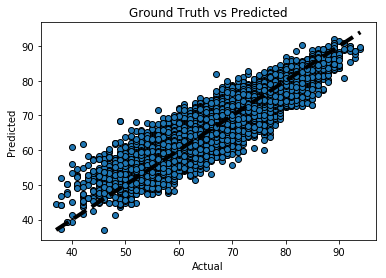

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_prediction,edgecolors=(0,0,0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

##### Conclusion
- R2 score and MSE are both very good. This means that we have found a good fitting model to predict the player rating